### Checklist for submission

It is extremely important to make sure that:

1. Everything runs as expected (no bugs when running cells);
2. The output from each cell corresponds to its code (don't change any cell's contents without rerunning it afterwards);
3. All outputs are present (don't delete any of the outputs);
4. Fill in all the places that say `# YOUR CODE HERE`, or "**Your answer:** (fill in here)".
5. Never copy/paste any notebook cells. Inserting new cells is allowed, but it should not be necessary.
6. The notebook contains some hidden metadata which is important during our grading process. **Make sure not to corrupt any of this metadata!** The metadata may for example be corrupted if you copy/paste any notebook cells, or if you perform an unsuccessful git merge / git pull. It may also be pruned completely if using Google Colab, so watch out for this. Searching for "nbgrader" when opening the notebook in a text editor should take you to the important metadata entries.
7. Although we will try our very best to avoid this, it may happen that bugs are found after an assignment is released, and that we will push an updated version of the assignment to GitHub. If this happens, it is important that you update to the new version, while making sure the notebook metadata is properly updated as well. The safest way to make sure nothing gets messed up is to start from scratch on a clean updated version of the notebook, copy/pasting your code from the cells of the previous version into the cells of the new version.
8. If you need to have multiple parallel versions of this notebook, make sure not to move them to another directory.
9. Although not forced to work exclusively in the course `conda` environment, you need to make sure that the notebook will run in that environment, i.e. that you have not added any additional dependencies.

**FOR HA1, HA2, HA3 ONLY:** Failing to meet any of these requirements might lead to either a subtraction of POEs (at best) or a request for resubmission (at worst).

We advise you to perform the following steps before submission to ensure that requirements 1, 2, and 3 are always met: **Restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). This might require a bit of time, so plan ahead for this (and possibly use Google Cloud's GPU in HA1 and HA2 for this step). Finally press the "Save and Checkout" button before handing in, to make sure that all your changes are saved to this .ipynb file.

### Fill in name of notebook file
This might seem silly, but the version check below needs to know the filename of the current notebook, which is not trivial to find out programmatically.

You might want to have several parallel versions of the notebook, and it is fine to rename the notebook as long as it stays in the same directory. **However**, if you do rename it, you also need to update its own filename below:

In [1]:
nb_fname = "IHA2.ipynb"

### Fill in group number and member names (use NAME2 and GROUP only for HA1, HA2 and HA3):

In [2]:
NAME1 = "Sarah Al-Khateeb" 
NAME2 = ""
GROUP = ""

### Check Python version

In [3]:
from platform import python_version_tuple
assert python_version_tuple()[:2] == ('3','7'), "You are not running Python 3.7. Make sure to run Python through the course Conda environment."

### Check that notebook server has access to all required resources, and that notebook has not moved

In [4]:
import os
nb_dirname = os.path.abspath('')
assignment_name = os.path.basename(nb_dirname)
assert assignment_name in ['IHA1', 'IHA2', 'HA1', 'HA2', 'HA3'], \
    '[ERROR] The notebook appears to have been moved from its original directory'

### Verify correct nb_fname

In [5]:
from IPython.display import display, HTML
try:
    display(HTML(r'<script>if("{nb_fname}" != IPython.notebook.notebook_name) {{ alert("You have filled in nb_fname = \"{nb_fname}\", but this does not seem to match the notebook filename \"" + IPython.notebook.notebook_name + "\"."); }}</script>'.format(nb_fname=nb_fname)))
except NameError:
    assert False, 'Make sure to fill in the nb_fname variable above!'

### Verify that your notebook is up-to-date and not corrupted in any way

In [6]:
import sys
sys.path.append('..')
from ha_utils import check_notebook_uptodate_and_not_corrupted
check_notebook_uptodate_and_not_corrupted(nb_dirname, nb_fname)

Matching current notebook against the following URL:
http://raw.githubusercontent.com/JulianoLagana/deep-machine-learning/master/home-assignments/IHA2/IHA2.ipynb
[SUCCESS] No major notebook mismatch found when comparing to latest GitHub version. (There might be minor updates, but even that is the case, submitting your work based on this notebook version would be acceptable.)


# IHA2 - Catching Pokemon

![](http://tibetanitech.com/wp-content/uploads/2016/09/Pokemon-GO.jpg)

In this home assignment, you'll apply roughly the same principles we used when doing logistic regression on the Iris dataset in Computer Lab 1, but on a new and very interesting dataset. We'll use the [Predict'em All dataset from Kaggle](https://www.kaggle.com/semioniy/predictemall) (download the dataset directly from Kaggle using this link). This dataset consists of roughly 293,000 [pokemon](http://www.pokemongo.com/) sightings (historical appearances of Pokemon in the Pokemon Go game), with geographical coordinates, time, weather, population density, distance to pokestops/gyms etc. as features. A comprehensive list of all the features is available at [the dataset's homepage](https://www.kaggle.com/semioniy/predictemall)

The context is simple: you are a Pokemon hunter, and there are only three Pokemon left for you to complete your collection. You'll do anything to capture them, including changing where you'll spend your next holidays! You know that some Pokemon only spawn in certain places of the world. Since you like machine learning so much, you figure it would be a great idea to train a classifier that, based on a location's latitude and longitude, can tell us which Pokemon is more likely to appear there.

The assignment is broken down into six steps.

1. Loading the data and extracting the desired subset of it
2. Visualization of the dataset
3. Preprocessing
4. Training
5. Evaluation
6. Exploration


Feel free to add cells wherever you see fit, and play around with this notebook as much as you want when developing the solutions. However, the solution you upload to Canvas must have the exact format shown here, with only the cells present here.

Don't restrict yourself only to what was taught so far. Some of the tasks might require you to search for new information. However, **be sure that you do the assignment using PyTorch** since we will be using it through the following assignments as well. [The python docs](https://docs.python.org/3/), [pytorch docs](https://pytorch.org/docs/stable/index.html), [stackoverflow](https://stackoverflow.com/), and Google are your friends!

**Hint:** Solving Computer Lab 1 (CL1) is a good way to get prepared for this assignment.

## 0. Imports

Import any necessary modules here.

In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
from torch.autograd import Variable
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

## 1. Loading and extracting subset

The first step consists of filtering the dataset by the three pokemon you are interested at. 

Start by loading the `'300k.csv'` file using pandas. If you haven't downloaded it yet, use [this link](https://www.kaggle.com/semioniy/predictemall) to do so. 

In [8]:
df = pd.read_csv('300k.csv',dtype={'pokestopDistanceKm': object})

Create a new `DataFrame` with only the columns `latitude`, `longitude`, and `class`.

In [9]:
data = df[['latitude', 'longitude', 'class']]
data.head()

,latitude,longitude,class
0,20.525745,-97.460829,16
1,20.523695,-97.461167,133
2,38.903590,-77.199780,16
3,47.665903,-122.312561,13
4,47.666454,-122.311628,133


Note that the `class` column specifies which pokemon it is. However, it only has the numerical id of the pokemon. For convenience, use the following dictionary to convert between ids and names.

In [10]:
name_dict={1: 'Bulbasaur', 2: 'Ivysaur', 3: 'Venusaur', 4: 'Charmander', 5: 'Charmeleon', 6: 'Charizard', 7: 'Squirtle', 8: 
          'Wartortle', 9: 'Blastoise', 10: 'Caterpie', 11: 'Metapod', 12: 'Butterfree', 13: 'Weedle', 14: 'Kakuna', 
          15: 'Beedrill', 16: 'Pidgey', 17: 'Pidgeotto', 18: 'Pidgeot', 19: 'Rattata', 20: 'Raticate', 21: 'Spearow',
          22: 'Fearow', 23: 'Ekans', 24: 'Arbok', 25: 'Pikachu', 26: 'Raichu', 27: 'Sandshrew', 28: 'Sandslash', 
          29: 'Nidoran F', 30: 'Nidorina', 31: 'Nidoqueen',32: 'Nidoran M', 33: 'Nidorino', 34: 'Nidoking', 35: 'Clefairy',
          36: 'Clefable', 37: 'Vulpix', 38: 'Ninetales', 39: 'Jigglypuff', 40: 'Wigglytuff', 41: 'Zubat', 42: 'Golbat', 
          43: 'Oddish', 44: 'Gloom', 45: 'Vileplume', 46: 'Paras', 47: 'Parasect', 48: 'Venonat', 49: 'Venomoth',
          50: 'Diglett', 51: 'Dugtrio', 52: 'Meowth', 53: 'Persian', 54: 'Psyduck',55: 'Golduck', 56: 'Mankey', 
          57: 'Primeape', 58: 'Growlithe', 59: 'Arcanine', 60: 'Poliwag', 61: 'Poliwhirl', 62: 'Poliwrath',
          63: 'Abra', 64: 'Kadabra', 65: 'Alakazam', 66: 'Machop', 67: 'Machoke', 68: 'Machamp', 69: 'Bellsprout', 
          70: 'Weepinbell', 71: 'Victreebel', 72: 'Tentacool', 73: 'Tentacruel', 74: 'Geodude', 75: 'Graveler',
          76: 'Golem', 77: 'Ponyta', 78: 'Rapidash', 79: 'Slowpoke', 80: 'Slowbro', 81: 'Magnemite', 82: 'Magneton',
          83: "Farfetch'd", 84: 'Doduo', 85: 'Dodrio', 86: 'Seel', 87: 'Dewgong', 88: 'Grimer', 89: 'Muk', 
          90: 'Shellder', 91: 'Cloyster', 92: 'Gastly', 93: 'Haunter', 94: 'Gengar', 95: 'Onix', 96: 'Drowzee',
          97: 'Hypno', 98: 'Krabby', 99: 'Kingler', 100: 'Voltorb', 101: 'Electrode', 102: 'Exeggcute', 103: 'Exeggutor', 
          104: 'Cubone', 105: 'Marowak', 106: 'Hitmonlee', 107: 'Hitmonchan', 108: 'Lickitung', 109: 'Koffing',
          110: 'Weezing', 111: 'Rhyhorn', 112: 'Rhydon', 113: 'Chansey', 114: 'Tangela', 115: 'Kangaskhan', 116: 'Horsea', 
          117: 'Seadra', 118: 'Goldeen', 119: 'Seaking', 120: 'Staryu', 121: 'Starmie', 122: 'Mr. Mime', 123: 'Scyther', 
          124: 'Jynx', 125: 'Electabuzz', 126: 'Magmar', 127: 'Pinsir', 128: 'Tauros', 129: 'Magikarp', 130: 'Gyarados', 
          131: 'Lapras', 132: 'Ditto', 133: 'Eevee', 134: 'Vaporeon', 135: 'Jolteon', 136: 'Flareon', 137: 'Porygon', 
          138: 'Omanyte', 139: 'Omastar', 140: 'Kabuto', 141: 'Kabutops', 142: 'Aerodactyl', 143: 'Snorlax', 144: 'Articuno',
          145: 'Zapdos', 146: 'Moltres', 147: 'Dratini', 148: 'Dragonair', 149: 'Dragonite', 150: 'Mewtwo', 'Bulbasaur': 1, 'Ivysaur': 2, 'Venusaur': 3, 'Charmander': 4, 'Charmeleon': 5, 'Charizard': 6, 'Squirtle': 7, 'Wartortle': 8, 'Blastoise': 9, 'Caterpie': 10, 'Metapod': 11, 'Butterfree': 12, 'Weedle': 13, 'Kakuna': 14, 'Beedrill': 15, 'Pidgey': 16, 'Pidgeotto': 17, 'Pidgeot': 18, 'Rattata': 19, 'Raticate': 20, 'Spearow': 21, 'Fearow': 22, 'Ekans': 23, 'Arbok': 24, 'Pikachu': 25, 'Raichu': 26, 'Sandshrew': 27, 'Sandslash': 28, 'Nidoran F': 29, 'Nidorina': 30, 'Nidoqueen': 31, 'Nidoran M': 32, 'Nidorino': 33, 'Nidoking': 34, 'Clefairy': 35, 'Clefable': 36, 'Vulpix': 37, 'Ninetales': 38, 'Jigglypuff': 39, 'Wigglytuff': 40, 'Zubat': 41, 'Golbat': 42, 'Oddish': 43, 'Gloom': 44, 'Vileplume': 45, 'Paras': 46, 'Parasect': 47, 'Venonat': 48, 'Venomoth': 49, 'Diglett': 50, 'Dugtrio': 51, 'Meowth': 52, 'Persian': 53, 'Psyduck': 54, 'Golduck': 55, 'Mankey': 56, 'Primeape': 57, 'Growlithe': 58, 'Arcanine': 59, 'Poliwag': 60, 'Poliwhirl': 61, 'Poliwrath': 62, 'Abra': 63, 'Kadabra': 64, 'Alakazam': 65, 'Machop': 66, 'Machoke': 67, 'Machamp': 68, 'Bellsprout': 69, 'Weepinbell': 70, 'Victreebel': 71, 'Tentacool': 72, 'Tentacruel': 73, 'Geodude': 74, 'Graveler': 75, 'Golem': 76, 'Ponyta': 77, 'Rapidash': 78, 'Slowpoke': 79, 'Slowbro': 80, 'Magnemite': 81, 'Magneton': 82, 'Farfetch\'d': 83, 'Doduo': 84, 'Dodrio': 85, 'Seel': 86, 'Dewgong': 87, 'Grimer': 88, 'Muk': 89, 'Shellder': 90, 'Cloyster': 91, 'Gastly': 92, 'Haunter': 93, 'Gengar': 94, 'Onix': 95, 'Drowzee': 96, 'Hypno': 97, 'Krabby': 98, 'Kingler': 99, 'Voltorb': 100, 'Electrode': 101, 'Exeggcute': 102, 'Exeggutor': 103, 'Cubone': 104, 'Marowak': 105, 'Hitmonlee': 106, 'Hitmonchan': 107, 'Lickitung': 108, 'Koffing': 109, 'Weezing': 110, 'Rhyhorn': 111, 'Rhydon': 112, 'Chansey': 113, 'Tangela': 114, 'Kangaskhan': 115, 'Horsea': 116, 'Seadra': 117, 'Goldeen': 118, 'Seaking': 119, 'Staryu': 120, 'Starmie': 121, 'Mr. Mime': 122, 'Scyther': 123, 'Jynx': 124, 'Electabuzz': 125, 'Magmar': 126, 'Pinsir': 127, 'Tauros': 128, 'Magikarp': 129, 'Gyarados': 130, 'Lapras': 131, 'Ditto': 132, 'Eevee': 133, 'Vaporeon': 134, 'Jolteon': 135, 'Flareon': 136, 'Porygon': 137, 'Omanyte': 138, 'Omastar': 139, 'Kabuto': 140, 'Kabutops': 141, 'Aerodactyl': 142, 'Snorlax': 143, 'Articuno': 144, 'Zapdos': 145, 'Moltres': 146, 'Dratini': 147, 'Dragonair': 148, 'Dragonite': 149, 'Mewtwo': 150}

In [11]:
# example usage (you can index either by name or id)
print(name_dict['Gengar'])
print(name_dict[94])

94
Gengar


We are only interested in three specific pokemon: Diglett, Seel, and Tauros.

<table style="width:100%">
  <tr>
    <th> <center>Diglett</center> </th>
    <th> <center>Seel</center> </th> 
    <th> <center>Tauros</center> </th>
  </tr>
  <tr>
    <td><img src=https://assets.pokemon.com/assets/cms2/img/pokedex/full/050_f2.png alt=Digglet></td>
    <td><img src=https://pokemon.gamepedia.com/media/pokemon.gamepedia.com/thumb/f/f1/Seel.png/200px-Seel.png?version=2c32fbe0af2d0da707e5dbcb40472fbf></td>
    <td><img src=https://vignette2.wikia.nocookie.net/pokemon/images/0/01/128Tauros_AG_anime.png/revision/latest?cb=20140924030616></td>
  </tr>
</table>



Filter the dataset to contain only these pokemon.

In [12]:
Pokemon = ['Tauros','Diglett', 'Seel']
l = [name_dict[i]for i in Pokemon]
data = data[data['class'].isin(l)]
data['pokemon'] = data['class'].replace(l, Pokemon)
data.head()

,latitude,longitude,class,pokemon
90,49.146199,-122.638105,50,Diglett
137,44.476769,-73.212749,128,Tauros
225,39.767486,-86.161068,128,Tauros
550,49.999197,9.066973,86,Seel
629,25.724382,-100.379311,50,Diglett


## 2. Visualization of the dataset

The second step consists of visualizing the dataset. This will help you understand the distribution of the features and get an idea of how hard the task will be.

Plot a histogram of the number of occurrences of each class.

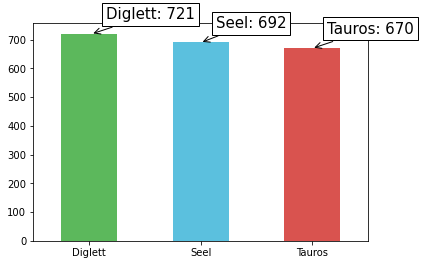

In [13]:
fig, ax = plt.subplots()
c = data['pokemon'].value_counts()
c.plot(ax=ax, kind='bar', color=['#5cb85c','#5bc0de','#d9534f'])
plt.xticks(rotation='horizontal')
#plt.show();
labels = ['Diglett: {}'.format(c[0]), 'Seel: {}'.format(c[1]),'Tauros: {}'.format(c[2])]
positions = [(0.02, 720), (1, 690), (2, 670)]
for label, xy in zip(labels, positions):
        ax.annotate(label, xy, xytext=(15, 15), size=15,
                    textcoords='offset points',
                    bbox={'facecolor':'white'},
                    arrowprops={'arrowstyle':'->'})

Is the dataset balanced?

**Your answer:** 

- We can see that each class in this dataset has approximately the same number of samples, no big difference between the counts for each pokemon, so we can say that our dataset is relatively balanced.

Plot a scatter plot where the first dimension is latitude, the second is longitude, and each point is a Pokemon. Further, the color of each point should represent which Pokemon it is. Lastly, the marker at each point should be an `'x'`. Make sure to label each axis.

Hints:

- The `scatter` method from `matplotlib` accepts an argument called `c`.
- The `scatter` method also accepts an argument called `marker`.

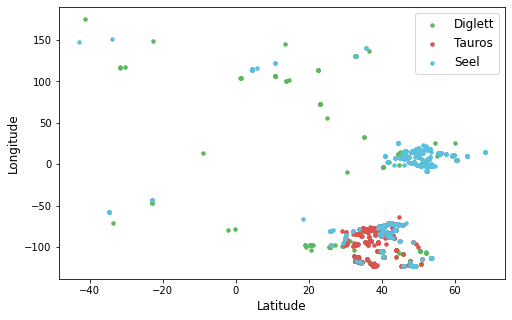

In [14]:
fig, ax = plt.subplots(figsize=(8,5))

d = data['pokemon']
po = d.unique()
color = {'Diglett': '#5cb85c', 'Seel': '#5bc0de', 'Tauros': '#d9534f'}

for n in po:
    ax.scatter(data['latitude'][d == n], data['longitude'][d == n], marker='o', label=n, c=color[n], s=12)
    
ax.legend(fontsize=12)
ax.set_xlabel('Latitude', fontsize=12)
ax.set_ylabel('Longitude', fontsize=12)
plt.show();

Is there any other visualization you think would be useful? If so, insert it here.

**Your answer:** 

- I think plotting a map with the longitude and latitude would be good since it will show where exactly the location, this visualization is really helpful but I couldn't manage to plot it without extra packages such as geopandas. I did the plot outside the environment and the results were cool, I noticed that these pokemon are concentrated in North America and Europe and few samples are scattered in different places. 


- So instead, I thought plotting boxplots for both latitude and longitude features will show where the three pokemon are mostly found in terms of numbers and where these pokemon are concentrated and what outliers could we find among these features for the three classes. Boxplots show the median (line in the middle of each box) for latitude and longitude for each pokemon and we can notice the shape of the distribution from the boxes if it is approximately normal or skewed. We can notice from the boxplot the behavior of Diglett class and it is similar to what we saw in the scatter, points are located outside the box, also we have the seel class shows a bit outliers in the latitude feature (Normalization could show results better). Moreover, we can notice how the classes overlap with the same values in both plots.

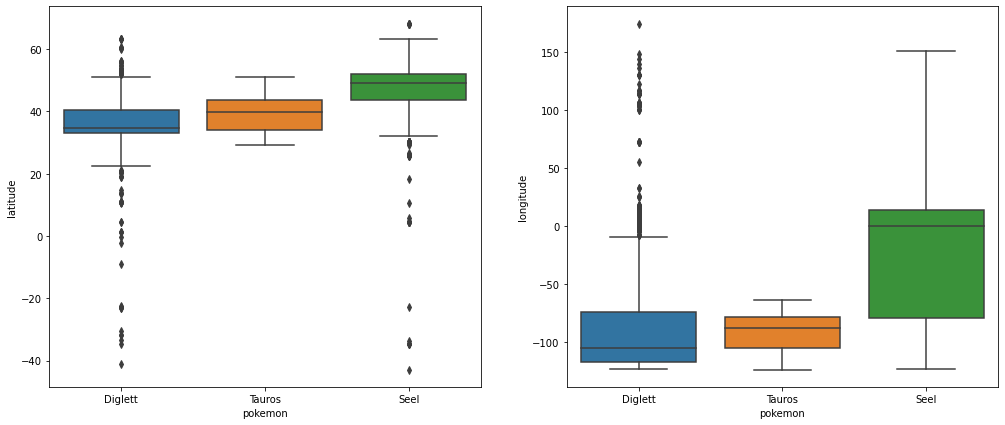

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(17,7))

sns.boxplot(x='pokemon', y='latitude', orient='v' , data=data, ax=axes[0])
sns.boxplot(x='pokemon', y='longitude', orient='v' , data=data, ax=axes[1])

fig.subplots_adjust(wspace=0.2);

How hard do you think the problem is? Which classes can/cannot be easily separated?


**Your answer:** 

- From the scatter plot above, we can see that the problem would be a bit hard to solve. The majority of Diglett class (green circles) are mixed with the Tauros class (red circles) and the Seel class (blue circles), so it seems like it will be hard to separate them. Furthermore, the Diglett class/Seel Class is concentrated into 2 big blobs that are quite separated from one another, so I can say that this problem requires a non-linear in the solution to achieve good accuracy and be able to separate the classes. Also, the Tauros and Seel classes seem to be a bit better separated from each other with a bit mixed in one blob (the one below).

Which accuracy do you expect to achieve?

**Your answer:** 

- Choosing a class completely randomly would give us 1/3 chance of getting the correct answer since the classes are quite balanced (We would get the same accuracy if all the 3 pokemons are spread equally around the world). However, in this case, we have the Tauros and Seel classes being well-separated (while Diglett class is not), assuming that we can predict the Tauros and Seel classes perfectly, and predict the Diglett class randomly, then the probability would be around 0.5 or 50%. Using a good neural network or a nonlinear algorithm, I would expect the accuracy to be higher than 50%.

## 3. Preprocessing

The third step consists of processing the data before training, such as dividing the dataset into training, validation, and test sets. Some tranformations can also be applied to the dataset in order to improve the performance of the network. 

Start by creating the input and output vectors.

In [16]:
#we can also use get_dummies method for One hot encoding instead but this will create more columns
x = data[['latitude', 'longitude']].values

def encode_pokemon(pokemon):
    if pokemon == 50:
        return 0
    if pokemon == 128:
        return 1
    if pokemon == 86:
        return 2
    else:
        raise ValueError('Pokemon \'{}\' is not recognized.'.format(pokemon))

enc_pokemon = map(encode_pokemon, data['class'].values)
y = np.array(list(enc_pokemon))

Separate your data into training (55%), validation (25%) and test sets (20%). If you wish to apply any transformation to the dataset, do it here as well. 

In [17]:
#setting some seeds and splitting the data by applying the train_test_split twice
np.random.seed(9)
torch.manual_seed(9)
torch.initial_seed()
#split data into train, validation and test
X_train, x_test, Y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.3125)

#x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.int64)
x_val = torch.tensor(x_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.int64)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.int64)


t_dataset = TensorDataset(x_train, y_train)
t_data_loader = DataLoader(t_dataset, batch_size=32, shuffle=True)

val_dataset = TensorDataset(x_val, y_val)
val_data_loader = DataLoader(val_dataset, batch_size=16, shuffle=True)
x_train.size(), x_val.size(), x_test.size()

(torch.Size([1145, 2]), torch.Size([521, 2]), torch.Size([417, 2]))

## 4. Training

The fourth step is where you will choose the architecture of your network (number of hidden layers, activation functions, etc.), and train it. 

Start by choosing an architecture for your network.

In [18]:
#The Neural Network architecture
class PokemonNet(nn.Module):
    
    def __init__(self, n_inputs):
        super(PokemonNet, self).__init__()
        # define 5 hidden layers with the first as the input hidden layer and last as output
        self.hidden1 = nn.Linear(n_inputs, 20)
        self.act1 = nn.ReLU()
        self.hidden2 = nn.Linear(20, 10)
        self.act2 = nn.ReLU()
        self.hidden3 = nn.Linear(10, 8)
        self.act3 = nn.ReLU()
        self.hidden4 = nn.Linear(8, 5)
        self.act4 = nn.ReLU()
        self.hidden5 = nn.Linear(5, 3)
        self.act5 = nn.Softmax(dim=1)
 
    # forward propagate input
    def forward(self, X):
        # input hidden layers and last layer
        X = self.hidden1(X)
        X = self.act1(X)
        X = self.hidden2(X)
        X = self.act2(X)
        X = self.hidden3(X)
        X = self.act3(X)
        X = self.hidden4(X)
        X = self.act4(X)
        X = self.hidden5(X)
        X = self.act5(X)
        return X

model = PokemonNet(x_train.shape[1])

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Train the network.

In [19]:
for epoch in range(30):
    
    # Compute predictions in the training set
    tr_loss = []
    n_correct = 0
    for x, y in t_data_loader:
        preds = model(x)
        t_loss = loss_fn(preds, y)
        tr_loss.append(t_loss.item())
        
        n_correct += (preds.argmax(dim=1) == y).sum().item()
        #Compute back-prop in the training set
        t_loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    train_accuracy = n_correct/len(t_dataset)
    avg_train_loss = sum(tr_loss)/len(tr_loss)    

    # Compute predictions in the validation set
    val_loss = []
    n_correct = 0
    #adagrad deactivated
    with torch.no_grad():
        for x, y in val_data_loader:
            preds = model(x)
            v_loss = loss_fn(preds, y)
            val_loss.append(v_loss.item())
            
            n_correct += (preds.argmax(dim=1) == y).sum().item()
        val_accuracy = n_correct/len(val_dataset)
        avg_val_loss = sum(val_loss)/len(val_loss)      
        
        
    print(f'''Epoch {epoch} Train(loss, acc): {round(avg_train_loss,3), round(train_accuracy,3)},  Val(loss, acc): {round(avg_val_loss,3),round(val_accuracy,3)}''')

Epoch 0 Train(loss, acc): (1.087, 0.22),  Val(loss, acc): (1.046, 0.363)
Epoch 1 Train(loss, acc): (1.03, 0.501),  Val(loss, acc): (0.996, 0.679)
Epoch 2 Train(loss, acc): (0.993, 0.579),  Val(loss, acc): (0.966, 0.572)
Epoch 3 Train(loss, acc): (0.97, 0.559),  Val(loss, acc): (0.95, 0.572)
Epoch 4 Train(loss, acc): (0.953, 0.579),  Val(loss, acc): (0.927, 0.637)
Epoch 5 Train(loss, acc): (0.93, 0.637),  Val(loss, acc): (0.912, 0.676)
Epoch 6 Train(loss, acc): (0.913, 0.642),  Val(loss, acc): (0.894, 0.668)
Epoch 7 Train(loss, acc): (0.906, 0.644),  Val(loss, acc): (0.892, 0.666)
Epoch 8 Train(loss, acc): (0.899, 0.635),  Val(loss, acc): (0.886, 0.651)
Epoch 9 Train(loss, acc): (0.903, 0.652),  Val(loss, acc): (0.884, 0.641)
Epoch 10 Train(loss, acc): (0.896, 0.643),  Val(loss, acc): (0.888, 0.666)
Epoch 11 Train(loss, acc): (0.899, 0.646),  Val(loss, acc): (0.89, 0.668)
Epoch 12 Train(loss, acc): (0.901, 0.638),  Val(loss, acc): (0.887, 0.641)
Epoch 13 Train(loss, acc): (0.894, 0.638)

For you to pass this assignment, you must obtain an accuracy on the validation set greater than 50%. It may be necessary to search for a good architecture by trying several different ones. If you want a challenge, try getting an accuracy greater than 63%.

## 5. Evaluation

Once you achieved at least 50% accuracy in the validation set, we are done with training. Now we'll evaluate the performance of your classifier on the test set.

Compute the accuracy on the test set.

In [20]:
#calculate the predictions for the test set and calculate the accuracy
ts_preds = model(x_test).argmax(dim=1)

acc = (ts_preds == y_test).sum().item()/len(ts_preds)
print("Accuracy: %.3f" % acc)

Accuracy: 0.643


Compute the confusion matrix of your predictions on the test set.

In [21]:
confusion_matrix(y_test, ts_preds)

array([[ 79,  56,  25],
       [  9, 109,   0],
       [ 11,  48,  80]])

What can you conclude from the computed accuracy and confusion matrix?

**Your answer:** 

- Since I got approximately 63%-65% training accuracy, 67%-70% validation accuracy and about 64% test accuracy, I can say that the model can predict approximately 63% correct predictions on unseen data. The percentage is not that high and I think we can reach better accuracy using maybe better network architecture and there is the fact that we have a small data and only two features and so maybe we can look into increase these two first and test how much we can improve the predictions with more information.


- The first row belongs to the Diglett class (0 class). The model predicted 79 of these correctly and incorrectly predicted 56 of the Diglett to be Tauros (class 1) and 25 of the Diglett to be Seel (class 2). Similarly, the second row of the Tauros class (class 1) shows that the model predicted 109 of these correctly and incorrectly predicted 9 of the Tauros to be Diglett and 0 to be Seel, so the model is doing a good job separating between Tauros and Seel classes. The third row of the Seel class (class 2) shows that 80 was correctly classified and 11 of these were classified as Diglett and 48 was predicted as Tauros.

 
- I can say that the model did a fine job but not very good, there is some misclassification between the classes and it seems a bit hard to completely distinguish between them, which means that we need a better model or maybe more data/features that can help in gaining more information and classify these three pokemon even better. The accuracies are close in training, validation, and testing and I can say that the fact we do have a few samples and features so the model can't generalize very well or score high test accuracy. It is a bit tricky to try out different architectures and compare results but still, my NN is doing fine for this and I can implement improvements after observing current results.

Visualize the decision regions of the network. Overlap it with the points corresponding to the training data, such as in Section 2, by using the scatter plot function.

Hint: A simple way to do it is to generate a lot of points within a predefined range of longitude and latitude and apply your network to it. However, feel free to explore other ways.

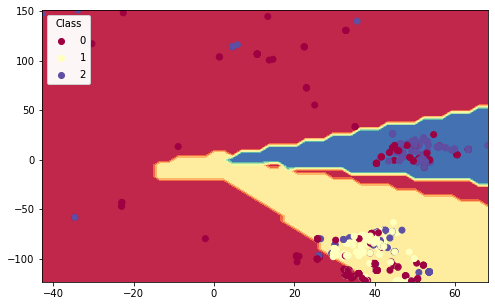

In [22]:
#Decision boundary function
def plot_decision_boundary(model, c, x,y):
    #extract max and min values from the training data
    lat = x.numpy()[:,0]
    long = x.numpy()[:,1]
    #find max and min in both longitude and latitude in the dataset to generate more points
    long_max, long_min = long.max(), long.min()
    lat_max, lat_min = lat.max(), lat.min()
    
    span_lat = np.linspace(lat_min,lat_max)
    span_long = np.linspace(long_min,long_max)
    xx1, xx2 = np.meshgrid(span_lat, span_long)
    
    # Predict the function value for the whole grid
    model.eval()
    z = np.empty(xx1.shape)
    grid = torch.Tensor(np.c_[xx1.ravel(), xx2.ravel()])
    
    with torch.no_grad():
        preds = model(grid)
        h_preds = preds.argmax(dim=1)
        z = h_preds.view(xx1.shape).numpy()
    
    # Plot the contour and training examples
    plt.contourf(xx1, xx2, z, cmap=plt.cm.Spectral)
    scatter = ax.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Spectral)
    #add a legend for the classes
    ax.add_artist(ax.legend(*scatter.legend_elements(), loc ="upper left", title ="Class") )


fig, ax = plt.subplots(figsize=(8,5))
plot_decision_boundary(model, ax, x_train, y_train)

Do the learned decision regions look like you would expect? Please comment on your results. 

**Your answer:** 

- The plot is similar to what I expected after seeing the above results, the boundaries represent the areas we saw in the scatter plot where the majority of classes concentrated. The blue region represents the Seel class, the yellow region represents the Tauros and the red is where the Diglett points where scatted the most. Adding more data made it more clear how these classes could be separated using the model but still, we can have a few misclassifications.

## 6. Exploration

You have now trained and evaluated a neural network for this particular classification task. Can you provide a brief explanation as to how you could use it to decide where to travel, if you're interested in capturing the aforementioned Pokemons?

**Your answer:** 

- I would start by creating a list of longitudes and latitudes of all the places I will travel to, then I will use the model that I have trained above to predict using this list of locations. Then I will filter out the results from prediction to contain only the pokemon/s I want to catch next.

Is (are) there any other feature(s) from the original dataset (e.g. hour of the day, pressure, wind speed, population density, etc.) which you think would be valuable to add as an input feature to your classifier to improve its performance? 

**Your answer:** 

- It is hard to decide which features might be valuable to add to improve the performance without performing some exploration and observe the outcomes with this additional data. I think because this data doesn't really come from some natural or human-related events, intuition is something that won't help much in this case. The first thing I can think of is to plot several histograms or scatter plots that might help in detecting what might be useful or if there is anything that can help in more classifying these pokemon.

To investigate your hypothesis, plot a histogram of the selected feature(s) for each one of the pokemons we're interested in. For example, if you think pressure and population density are valuable for prediction, plot 6 histograms. 3 of them will be the pressure histograms for each class ('Diglett', 'Seel' and 'Tauros'), and the other 3 will be the population density for each class.

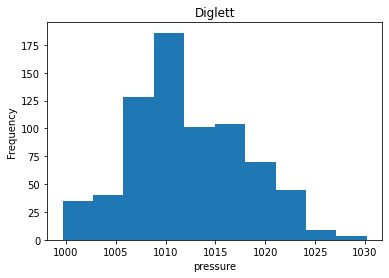

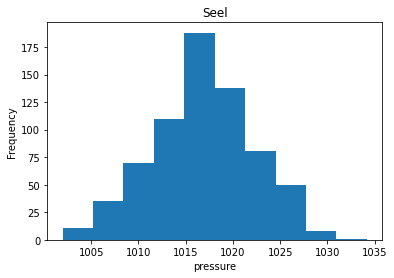

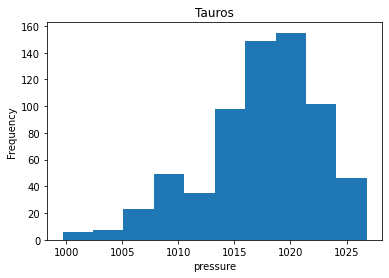

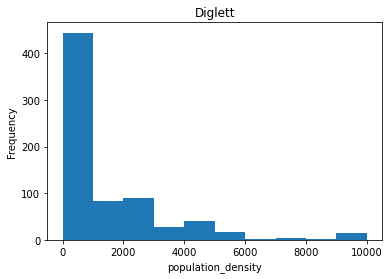

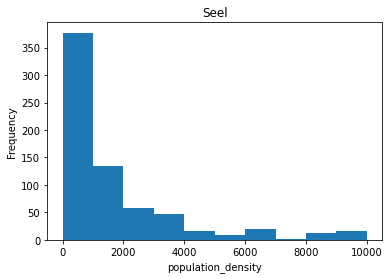

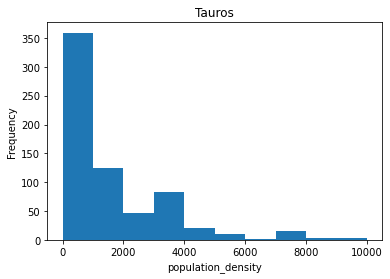

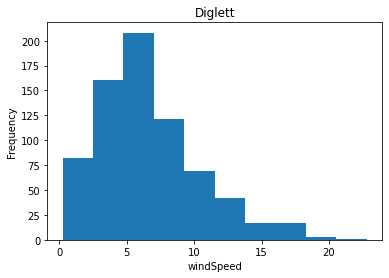

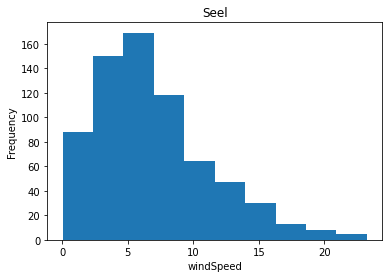

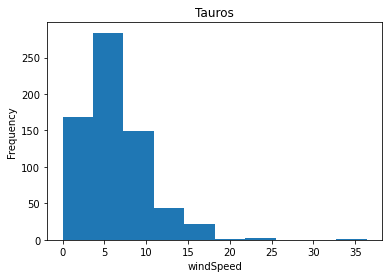

In [23]:
#function to plot histograms with labels and titles for each pokemon
def plot_hist(data, pokemons, feature):
    
    f = data[[feature]]
    for p in pokemons:
        fig, ax = plt.subplots()
        values = f[data['name'] == p][feature]
        
        if is_numeric_dtype(values) and values.dtype != 'bool':
            values.plot(ax=ax, kind='hist', title=p, legend=None)
        else:
            values.value_counts().plot(ax=ax, kind='bar', title=p)  
        ax.set_xlabel(feature)

poke = ['Diglett', 'Seel', 'Tauros']
df1 = df[df['class'].isin([name_dict[p] for p in poke])]
df1 = df1.assign(name=[name_dict[id] for id in df1['class']])

plot_hist(df1, poke, 'pressure')
plot_hist(df1, poke, 'population_density')
plot_hist(df1, poke, 'windSpeed')

What does(do) this(ese) histogram(s) show you? Could it be beneficial to add this(ese) new feature(s) as input? Explain why/why not.

**Your answer:** 

- In general, if the histogram distributions are similar in all classes, we can say that the feature is probably not very helpful in distinguishing or adding a useful feature for classification.


- We can see from the above pressure histograms, considering the distribution shape, Diglett seems to have lower pressure than Seel and Tauros. Thus I would say including Pressure would probably be a good idea since these three pokemon have different pressure trends. As for population density, it is a bit hard to say from the histogram whether this feature could be useful in distinguishing thees classes, so probably I should look for other features that might show a clear difference in these three classes.

The purpose was this assignment was mostly to make you design a network for classification, using this Pokemon dataset as use case. However, if you want to find those three particular Pokemons, most likely using a network for classification is not the best approach. An alternative would be to perform localization by using regression instead. **Can you state some pros and cons of approach this as a regression problem instead of a classification problem?** (We do not except very detailed answers, you will pass the assignment as long as you make a reasonable attempt at explaining the pros and cons.)

**Your answer:** 


- There are different things I can think of when considering to do this problem as a regression problem such as a single pokemon can move and thus we need sufficient information about this that might help to predict the trend of where this pokemon can be next (what if the Pokemon can be anywhere! on what time!) so there are several issues that need to be taken into consideration when thinking about this. Also, the outcome for this problem is two things; the longitude and latitude, this also need to be considered. Should we treat these points as one output and calculate a new number from both like haversine, or we might use what is called Multi-target regression to deal with more than one output case! What if two places have the same longitude and different latitude or vise versa? How the algorithm will deal with that and how we can build a network/algorithm that can classify this correctly?


#### That is being said I can now list of the pros and cons as: 

**Pros:**
1. I think it will be more helpful/useful to predict the location so instead of visiting all places or picking randomly, having a model/algorithm that can predict where a specific pokemon or the possibilities of where this pokemon can be will narrow the search and the process would be faster.

2. Using Multi-output regression might be more effective in terms of considering the relationship not only between the features but also between the targets, but this also can be considered as a con.

**Cons:**
1. Thinking of this problem, the hard part would be what algorithm is suitable to solve such a problem and how can we build an NN that can output multiple numerical values for specific input. Building such NN could more a bit harder. One solution could be using a combination of single-output models, which will be computationally expensive and the optimization will be for a single output not all and they won't use relationships between the target variables.

2. The outputs are dependent upon the input and upon each other, this means that the outputs dependent on each other and we need a model that predicts both outputs together or each output contingent upon other outputs.

## 7. (optional)

Assuming you found useful new features in the last part of this assignment, train a new classifier that uses these featues as well. Did the accuracy on the validation set improve? What's the highest accuracy you can achieve?

In [24]:
# YOUR CODE HERE